50 50
50 50
50 50
50 50


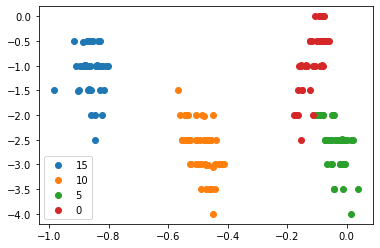

In [1]:
import glob, os

folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'

# rotate_f = pd.read_csv(os.path.join(folder_clean, 'd10_waterrotate_f_kde.csv'))
# rotate_t = pd.read_csv(os.path.join(folder_clean, 'd10_waterrotate_t_kde.csv'))
data = {}

rotate_f = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_r15_f_kde.csv'))
rotate_t = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_r15_t_kde.csv'))
print(len(rotate_f), len(rotate_t))
plt.scatter(np.unwrap(rotate_f['PHASE']) - np.unwrap(rotate_t['PHASE']), rotate_f['RSSI'] - rotate_t['RSSI'])
data['r15_phase_f'] = rotate_f['PHASE'].values
data['r15_phase_t'] = rotate_t['PHASE'].values
data['r15_rssi_f'] = rotate_f['RSSI'].values
data['r15_rssi_t'] = rotate_t['RSSI'].values

rotate_f = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_r10_f_kde.csv'))
rotate_t = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_r10_t_kde.csv'))
print(len(rotate_f), len(rotate_t))
plt.scatter(np.unwrap(rotate_f['PHASE']) - np.unwrap(rotate_t['PHASE']), rotate_f['RSSI'] - rotate_t['RSSI'])
data['r10_phase_f'] = rotate_f['PHASE'].values
data['r10_phase_t'] = rotate_t['PHASE'].values
data['r10_rssi_f'] = rotate_f['RSSI'].values
data['r10_rssi_t'] = rotate_t['RSSI'].values

rotate_f = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_r5_f_kde.csv'))
rotate_t = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_r5_t_kde.csv'))
print(len(rotate_f), len(rotate_t))
plt.scatter(np.unwrap(rotate_f['PHASE']) - np.unwrap(rotate_t['PHASE']), rotate_f['RSSI'] - rotate_t['RSSI'])
data['r5_phase_f'] = rotate_f['PHASE'].values
data['r5_phase_t'] = rotate_t['PHASE'].values
data['r5_rssi_f'] = rotate_f['RSSI'].values
data['r5_rssi_t'] = rotate_t['RSSI'].values

rotate_f = pd.read_csv(os.path.join(folder_clean, 'd11_water_f_kde.csv'))
rotate_t = pd.read_csv(os.path.join(folder_clean, 'd11_water_t_kde.csv'))
print(len(rotate_f), len(rotate_t))
plt.scatter(np.unwrap(rotate_f['PHASE']) - np.unwrap(rotate_t['PHASE']), rotate_f['RSSI'] - rotate_t['RSSI'])
data['r0_phase_f'] = rotate_f['PHASE'].values
data['r0_phase_t'] = rotate_t['PHASE'].values
data['r0_rssi_f'] = rotate_f['RSSI'].values
data['r0_rssi_t'] = rotate_t['RSSI'].values

plt.legend([15, 10, 5, 0])
# plt.xlim([-6.5, 6.5])
# plt.ylim([-6, 6])

# outdoor_f = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_water_front_kde_outdoor.csv')
# outdoor_t = pd.read_csv('D:\\Atom\\python\\data\\cleaned\\grill\\outdoor\\outdoor_d1_water_tail_kde_outdoor.csv')
# plt.scatter(np.unwrap(outdoor_f['PHASE']) - np.unwrap(outdoor_f['PHASE']), outdoor_f['RSSI'] - outdoor_f['RSSI'])
import scipy.io
scipy.io.savemat('tagrotate.mat', data)

r1 ['water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water' 'water'
 'water' 'water' 'water' 'water' 'water']
Correct 1.0
-------------------------------
r5 ['water' 'water' 'water' 'water' 'water' 'vinegar' 'vinegar' 'water'
 'vinegar' 'vinegar' 'vinegar' 'water' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'water' 'vinegar' 'vinegar' 'vinegar' 'water' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar'
 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar' 'vinegar']
Correct 0.18
-------------------------------
r10 ['wa

NameError: name 'matls' is not defined

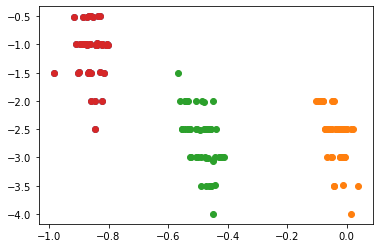

In [3]:
import joblib
folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
clf = joblib.load('model_all_nopi.joblib')

cnt = 0
correctcnt = 0

rotates = ['r1', 'r5', 'r10', 'r15']
for r in rotates:
    df_f = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_%s_f_kde.csv' % (r)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd11_watercomm_%s_t_kde.csv' % (r)))
    diff_p = np.unwrap(df_f['PHASE']) - np.unwrap(df_t['PHASE'])
    diff_r = df_f['RSSI'] - df_t['RSSI']
    plt.scatter(diff_p, diff_r)
#     result = tree.predict(np.column_stack((diff_p, diff_r, df_t['CHANNEL'])))
    result = clf.predict(np.column_stack((diff_p, diff_r)))
    print(r, result)
    correct = (result=='water').sum()
    print('Correct', correct/len(df_f))
    cnt += len(df_f)
    correctcnt += correct
    print('-------------------------------')
plt.legend(matls)
plt.xlim([-6, 6])
plt.ylim([-7, 3])
print(correctcnt, cnt, correctcnt/cnt)